In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
import re
import sklearn
from sklearn.naive_bayes import MultinomialNB
import wordcloud

sms = pd.read_csv('E:/Conda/sms-spam/smsspamcollection/SMSSpamCollection', 
                  sep='\t', 
                  names=['label','message'])
print(sms[0:10])
print(sms.shape)

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...
(5572, 2)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
sms.drop_duplicates(inplace=True)
sms.reset_index(drop=True, inplace=True)
print(sms.shape)
print(sms[0:10])

(5169, 2)
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


In [4]:
sms['label'] = sms.label.map({'ham':0, 'spam':1})
sms.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
sms.label.value_counts()

0    4516
1     653
Name: label, dtype: int64

e:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


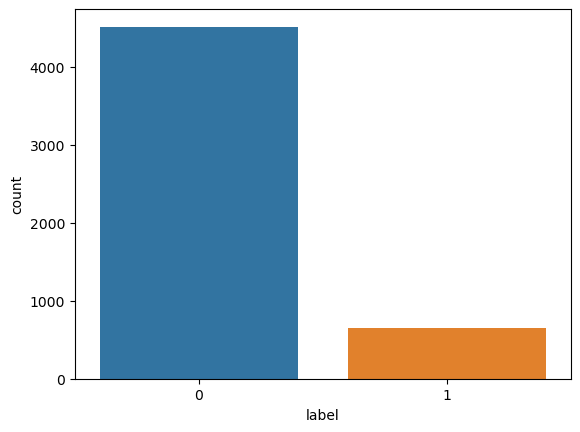

In [6]:
sns.countplot(sms['label'])
plt.savefig("dist")
plt.show()

In [7]:
data_ham = sms[sms['label'] == 0].copy()
data_spam = sms[sms['label'] == 1].copy()

def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['message'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords, background_color='white', colormap='viridis', width=800, height=600).generate(text)
    plt.figure(figsize=(10,7))
    plt.imshow(fig_wordcloud)
    plt.title(title)
    plt.axis('off')
    plt.show()

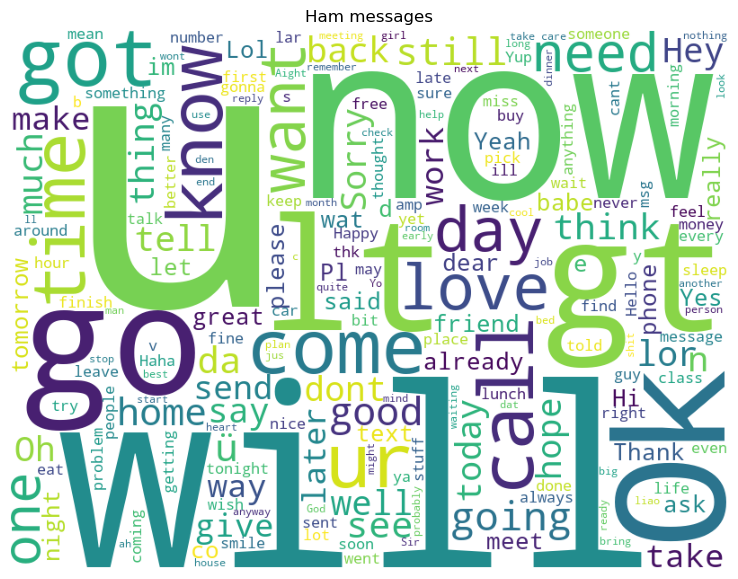

In [8]:
show_wordcloud(data_ham, "Ham messages")

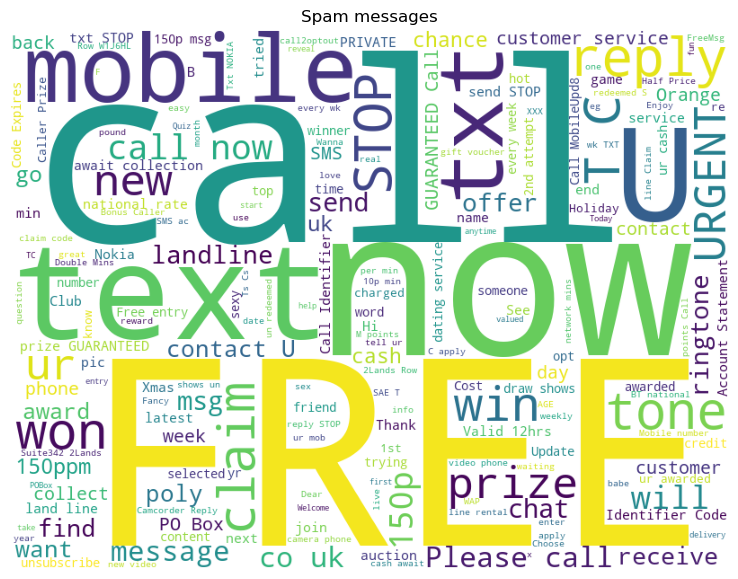

In [24]:
show_wordcloud(data_spam, "Spam messages")

In [9]:
corpus = []
ps = PorterStemmer()

for i in range(0,sms.shape[0]):
    #Cleaning special character from the message
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms.message[i]) 
    #Converting the entire message into lower case
    message = message.lower() 
    # Tokenizing the review by words
    words = message.split() 
    #Removing the stop words
    words = [word for word in words if word not in set(stopwords.words('english'))] 
    #Stemming the words
    words = [ps.stem(word) for word in words] 
    #Joining the stemmed words
    message = ' '.join(words) 
    #Building a corpus of messages
    corpus.append(message) 

print(corpus)

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli', 'u dun say earli hor u c alreadi say', 'nah think goe usf live around though', 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv', 'even brother like speak treat like aid patent', 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun', 'winner valu network custom select receivea prize reward claim call claim code kl valid hour', 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free', 'gonna home soon want talk stuff anymor tonight k cri enough today', 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info', 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw', 'search right word thank breather promis wont 

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y = pd.get_dummies(sms['label'])
y = y.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [11]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [12]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy Score {}".format(accuracy_score(y_test, y_pred)))
print("Classification Report")
print(classification_report(y_test, y_pred))

Accuracy Score 0.9777562862669246
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       896
           1       0.89      0.95      0.92       138

    accuracy                           0.98      1034
   macro avg       0.94      0.97      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [13]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    temp = cv.transform([final_message]).toarray()
    return classifier.predict(temp)

print(predict_spam("SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"))

[1]
